# Item-based collaborative filtering

In this notebook I show an example of a recommender system using python 3. Most of the ideas have been taken from [this link](https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d).

### Dataset

I will use one of the most popular movie datasets, the [MovieLens](https://grouplens.org/datasets/movielens/). The sample of this dataset that we use, called "ml-20m", describes 5-star rating and free-text tagging activity. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset is ideal as it allows us to perform several types or recommender systems.



## 1) Import libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

## 2) Data exploration

We load the data from the users and movies, that are separated in different datasets. This is how the loaded dataframes look like:

In [2]:
df_users = pd.read_csv('../data/users.csv')
df_users.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_movie_titles = pd.read_csv('../data/movies.csv',index_col=False)
df_movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We merge the two dataframes by the movie ID

In [4]:
df = pd.merge(df_users, df_movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


With the pandas "describe", it is possible to see the different columns and their statistics.

In [5]:
df.describe()

,userId,movieId,rating,timestamp
count,98180.000000,98180.000000,98180.000000,9.818000e+04
mean,326.348747,15938.331259,3.502567,1.197962e+09
std,182.344624,28668.177407,1.040068,2.135274e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1193.000000,3.000000,1.008558e+09
50%,325.000000,2890.000000,3.500000,1.179177e+09
75%,477.000000,7121.000000,4.000000,1.428575e+09
max,610.000000,131237.000000,5.000000,1.537799e+09


In order to understand the significance of the ratings, I calculate the mean and count of ratings per movie. In this sense, we perform a "groupby" by the columns "title" and "rating".

In [6]:
df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
df_ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


We plot the results in a histogram. We can see that most of the movies do not get a lot of ratings.

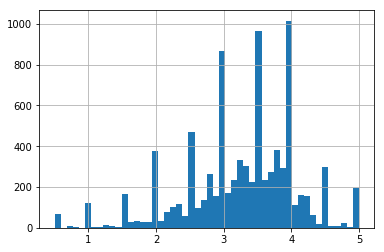

In [7]:
df_ratings['rating'].hist(bins=50)

We also check whether the ratings are spread over time or not

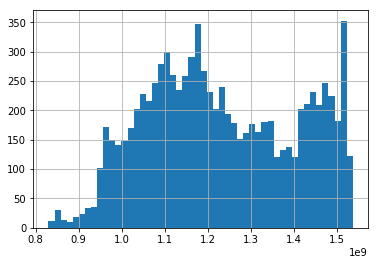

In [8]:
df_ratings_time = pd.DataFrame(df.groupby('title')['timestamp'].mean())
df_ratings_time['number_of_ratings'] = df.groupby('title')['timestamp'].count()
df_ratings_time['timestamp'].hist(bins=50)

From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous. Let’s now check the relationship between the rating of a movie and the number of ratings.

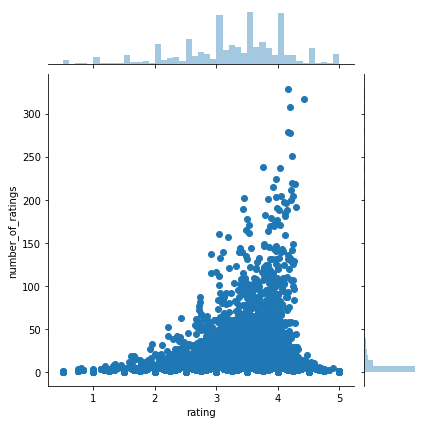

In [9]:
sns.jointplot(x='rating', y='number_of_ratings', data=df_ratings)

The plot shows that the movies with higher rating have more number of ratings.

# 3) Build the recommender system

In order to do create the item-based recommender system we need to convert our dataset into a matrix with the movie titles as the columns, the user_id as the index and the ratings as the values. By doing this we shall get a dataframe with the columns as the movie titles and the rows as the user ids. Each column represents all the ratings of a movie by all users. The rating appear as NAN where a user didn't rate a certain movie. We shall use this matrix to compute the correlation between the ratings of a single movie and the rest of the movies in the matrix. 

In [10]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...,Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s assume that a user has watched Avatar (2009) and Thor (2011). We would like like to recommend movies to this user based on this watching history. The goal is to look for movies that are similar to Thor (2011) and Avatar (2009) which we shall recommend to this user. We can achieve this by computing the correlation between these two movies’ ratings and the ratings of the rest of the movies in the dataset.

In [11]:
Avatar_user_rating = movie_matrix['Avatar (2009)']
Avatar_user_rating = Avatar_user_rating.dropna()
Avatar_user_rating.head()

userId
10    2.5
15    3.0
18    4.0
21    4.0
22    3.5
Name: Avatar (2009), dtype: float64

In order to compute the correlation between two dataframes we use pandas corrwith functionality. Corrwith computes the pairwise correlation of rows or columns of two dataframe objects. Let's use this functionality to get the correlation between each movie's rating and the ratings of the Avatar movie.

In [12]:
similar_to_Avatar=movie_matrix.corrwith(Avatar_user_rating)
corr_Avatar = pd.DataFrame(similar_to_Avatar, columns=['correlation'])
corr_Avatar.dropna(inplace=True)
corr_Avatar = corr_Avatar.join(df_ratings['number_of_ratings'])
corr_Avatar.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.353553,17
(500) Days of Summer (2009),0.131120,42
*batteries not included (1987),0.785714,7
10 Things I Hate About You (1999),0.265637,54
"10,000 BC (2008)",-0.075431,17


Some of the movies have very few ratings and may end up being recommended simply because one or two people gave them a 5 star rating. We can fix this by setting a threshold for the number of ratings. From the histogram earlier we saw a sharp decline in number of ratings from 100. We shall therefore set this as the threshold. In order to do this we need to join the two dataframes with the number_of_ratings column in the ratings dataframe.

In [13]:
corr_Avatar[df_ratings['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Trainspotting (1996),0.623735,102
"Monsters, Inc. (2001)",0.541616,132
"Net, The (1995)",0.530552,112
Finding Nemo (2003),0.501461,141
"Matrix, The (1999)",0.493241,278
Die Hard: With a Vengeance (1995),0.466794,144
Men in Black (a.k.a. MIB) (1997),0.459441,165
Star Wars: Episode VI - Return of the Jedi (1983),0.458785,196
"Terminator, The (1984)",0.448443,131


Finally, we have the list of movies that have similar ratings from the users than Avatar.
We perform the same for the Thor (2011) movie.

In [14]:
Thor_user_rating = movie_matrix['Thor (2011)']
Thor_user_rating = Thor_user_rating.dropna()
similar_to_Thor=movie_matrix.corrwith(Thor_user_rating)
corr_Thor = pd.DataFrame(similar_to_Thor, columns=['correlation'])
corr_Thor.dropna(inplace=True)
corr_Thor = corr_Thor.join(df_ratings['number_of_ratings'])
corr_Thor.head()
corr_Thor[df_ratings['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Stargate (1994),0.759494,140
Aladdin (1992),0.730377,183
Jurassic Park (1993),0.714481,238
"Lion King, The (1994)",0.710244,172
"Bourne Identity, The (2002)",0.705183,112
X-Men (2000),0.670755,133
Up (2009),0.665904,105
Batman Begins (2005),0.665208,116
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.658109,107
